In [2]:
import json
import sys
sys.path.append("../")

from models import DiffusivityData
from constants import *
from help_functions import *
from pathlib import Path
from optimize import Optimizer
from plots import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

## Prepare the data in DiffusionData object.

In [3]:
# Define a DiffusionData object.
elements = ["Ag", "Cu"]
system = elements[0] + elements[1]
phase = "FCC_A1"
diffusion_data = DiffusivityData(elements)
# load data
datafile = f"./{system}_diffusion_coefficient_data.xlsx"
diffusion_data.load_data_from_excel(datafile)

# thermodynamic interaction parameter datafile
thermo_inter_param_file = f"./{system}_thermodynamic_interaction_parameters.json"
diffusion_data.load_interaction_parameters(thermo_inter_param_file)
#
# # calculate end member diffusion coefficient data.
# end_member_file = "./end_member_database.json"
end_member_file = "all_end_members_database.json"
diffusion_data.end_member_calc(end_member_file)


In [4]:
diffusion_data.data.head()

,Literature,Dtype,Element,A_mp,T_C,Dexp,TF,Weight,comp_A_mf,comp_B_mf,temp_celsius,temp_kelvin
0,Sato et al.,DT,A,99.164678,850.0,1.079941e-13,NaN,1,0.991647,0.008353,850.0,1123.0
1,Sato et al.,DT,A,97.446300,850.0,1.453115e-13,NaN,1,0.974463,0.025537,850.0,1123.0
2,Sato et al.,DT,A,96.634840,850.0,1.630797e-13,NaN,1,0.966348,0.033652,850.0,1123.0
3,Sato et al.,DT,A,99.164678,820.0,6.165950e-14,NaN,1,0.991647,0.008353,820.0,1093.0
4,Sato et al.,DT,A,97.446300,820.0,8.433348e-14,NaN,1,0.974463,0.025537,820.0,1093.0


In [5]:
""" using Thermo-Calc owned databases. """
# tc_database="TCAL7"
# diffusion_data.thermodynamic_factor_calc(database_mode="calphad", database=tc_database)

""" read self defined database """
diffusion_data.thermodynamic_factor_calc()

diffusion_data.data.head()

,Literature,Dtype,Element,A_mp,T_C,Dexp,TF,Weight,comp_A_mf,comp_B_mf,temp_celsius,temp_kelvin
0,Sato et al.,DT,A,99.164678,850.0,1.079941e-13,1.0,1,0.991647,0.008353,850.0,1123.0
1,Sato et al.,DT,A,97.446300,850.0,1.453115e-13,1.0,1,0.974463,0.025537,850.0,1123.0
2,Sato et al.,DT,A,96.634840,850.0,1.630797e-13,1.0,1,0.966348,0.033652,850.0,1123.0
3,Sato et al.,DT,A,99.164678,820.0,6.165950e-14,1.0,1,0.991647,0.008353,820.0,1093.0
4,Sato et al.,DT,A,97.446300,820.0,8.433348e-14,1.0,1,0.974463,0.025537,820.0,1093.0


## compare tc-calculated and self-calculated thermodynamic factor

In [6]:
# tf_tc = diffusion_data.data.TF
# diffusion_data.thermodynamic_factor_calc()
# tf_self = diffusion_data.data.TF
# plt.scatter(tf_tc, tf_self, s=100)
# diffusion_data.data.head()

## Optimize the parameters using Optimizer object


In [6]:
optimizer = Optimizer(diffusion_data)


In [7]:
optimizer.diffusivity_data.data

,Literature,Dtype,Element,A_mp,T_C,Dexp,TF,Weight,comp_A_mf,comp_B_mf,temp_celsius,temp_kelvin
0,Sato et al.,DT,A,99.164678,850.0,1.079941e-13,1.0,1,0.991647,0.008353,850.0,1123.0
1,Sato et al.,DT,A,97.446300,850.0,1.453115e-13,1.0,1,0.974463,0.025537,850.0,1123.0
2,Sato et al.,DT,A,96.634840,850.0,1.630797e-13,1.0,1,0.966348,0.033652,850.0,1123.0
3,Sato et al.,DT,A,99.164678,820.0,6.165950e-14,1.0,1,0.991647,0.008353,820.0,1093.0
4,Sato et al.,DT,A,97.446300,820.0,8.433348e-14,1.0,1,0.974463,0.025537,820.0,1093.0
...,...,...,...,...,...,...,...,...,...,...,...,...
124,Oikawa et al.,DC,AB,99.893939,701.0,6.025596e-15,1.0,1,0.998939,0.001061,701.0,974.0
125,Oikawa et al.,DC,AB,99.000000,701.0,5.128614e-15,1.0,1,0.990000,0.010000,701.0,974.0
126,Oikawa et al.,DC,AB,98.000000,701.0,4.677351e-15,1.0,1,0.980000,0.020000,701.0,974.0
127,Oikawa et al.,DC,AB,96.000000,701.0,4.265795e-15,1.0,1,0.960000,0.040000,701.0,974.0


In [8]:
optimizer.init_params

array([0.26084418])

In [10]:
# predict diffusion coefficients at a given parameter value
diff_calc = optimizer.diffusivity_data.diffusion_coefs_calc([62922.572308])
diff_calc

0      9.028361e-14
1      1.002918e-13
2      1.052506e-13
3      5.389417e-14
4      6.000107e-14
           ...     
124    6.799567e-15
125    7.090806e-15
126    7.422543e-15
127    8.102979e-15
128    8.802530e-15
Length: 129, dtype: float64

In [11]:
# optimizer.init_params = [0.1, 0.2]
# optimizer.model="2-para"
# optimizer.method = "least_squares"
optimizer.optimize()

# optimizer.method = "minimize"
# optimizer.optimize(method="Nelder-Mead")

In [12]:
optimizer.optimized_results

{'OptimizedResult':      message: `gtol` termination condition is satisfied.
      success: True
       status: 1
          fun: [-1.943e-01 -4.165e-01 ...  5.603e-01  7.662e-01]
            x: [ 4.578e+04]
         cost: 5.096343924635553
          jac: [[ 8.628e-07]
                [ 2.364e-06]
                ...
                [ 3.864e-06]
                [ 4.925e-06]]
         grad: [ 8.653e-13]
   optimality: 8.652994024972195e-13
  active_mask: [ 0.000e+00]
         nfev: 20
         njev: 20,
 'mse': np.float64(5.096343924635553),
 'optimized_params': array([45780.92097237])}

In [13]:
df = diffusion_data.data

In [14]:
# df.plot(x = "Dexp", y = "D_1-para", kind="scatter", logx=True, logy=True)

<Axes: xlabel='Experimental D (m$^2$/s)', ylabel='Predicted D (m$^2$/s)'>

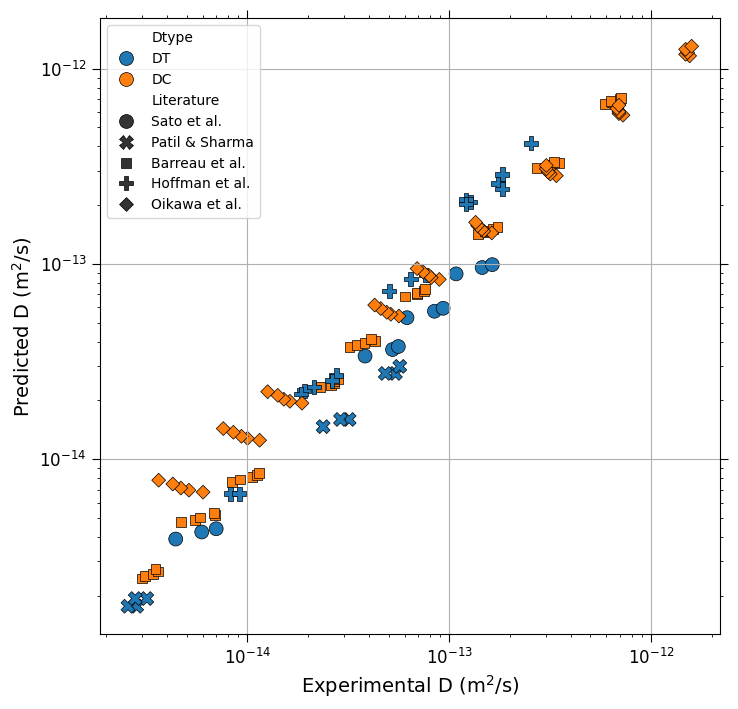

In [15]:
# matplotlib.rcParams['markers.fillstyle'] = "none"
# matplotlib.rcParams['lines.marker'] = None
matplotlib.rcParams['lines.markersize'] = 10
# matplotlib.rcParams['lines.markeredgecolor'] = "black"
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("Experimental D (m$^2$/s)")
ax.set_ylabel("Predicted D (m$^2$/s)")
ax.set_xscale('log')
ax.set_yscale('log', base=10)
ax.grid(True)
# ax.set_fc("b")
sns.scatterplot(
    data=df, x="Dexp", y="D_1-para", hue="Dtype", style="Literature",
    ax=ax, palette="tab10", edgecolor="black", linewidth=0.5
)

In [16]:
diffusion_data.data

,Literature,Dtype,Element,A_mp,T_C,Dexp,TF,Weight,comp_A_mf,comp_B_mf,temp_celsius,temp_kelvin,D_1-para
0,Sato et al.,DT,A,99.164678,850.0,1.079941e-13,1.0,1,0.991647,0.008353,850.0,1123.0,8.892104e-14
1,Sato et al.,DT,A,97.446300,850.0,1.453115e-13,1.0,1,0.974463,0.025537,850.0,1123.0,9.581305e-14
2,Sato et al.,DT,A,96.634840,850.0,1.630797e-13,1.0,1,0.966348,0.033652,850.0,1123.0,9.915100e-14
3,Sato et al.,DT,A,99.164678,820.0,6.165950e-14,1.0,1,0.991647,0.008353,820.0,1093.0,5.305864e-14
4,Sato et al.,DT,A,97.446300,820.0,8.433348e-14,1.0,1,0.974463,0.025537,820.0,1093.0,5.724977e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Oikawa et al.,DC,AB,99.893939,701.0,6.025596e-15,1.0,1,0.998939,0.001061,701.0,974.0,6.784336e-15
125,Oikawa et al.,DC,AB,99.000000,701.0,5.128614e-15,1.0,1,0.990000,0.010000,701.0,974.0,6.943762e-15
126,Oikawa et al.,DC,AB,98.000000,701.0,4.677351e-15,1.0,1,0.980000,0.020000,701.0,974.0,7.120903e-15
127,Oikawa et al.,DC,AB,96.000000,701.0,4.265795e-15,1.0,1,0.960000,0.040000,701.0,974.0,7.470417e-15


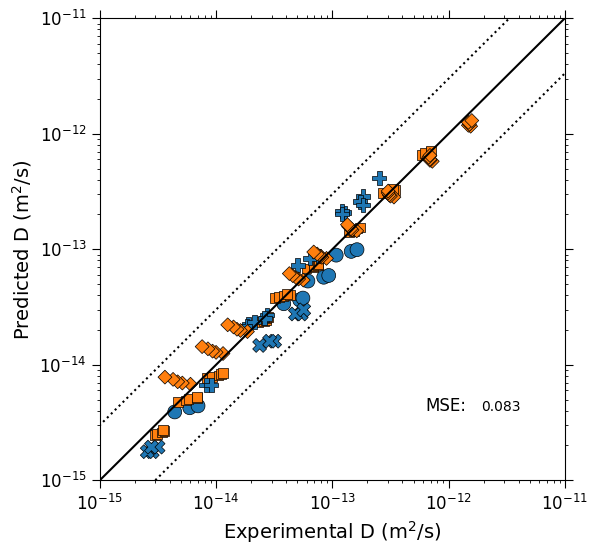

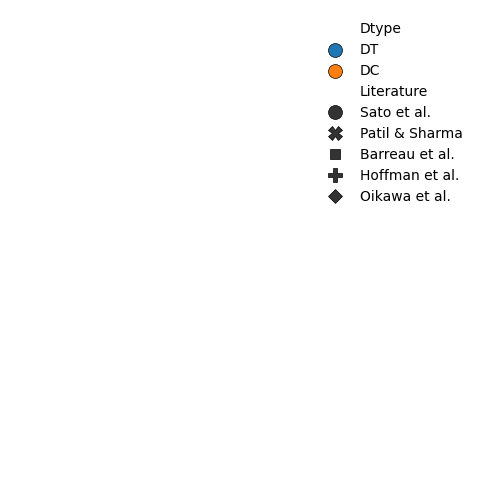

In [17]:
from plots import *
# matplotlib.rcdefaults()
# matplotlib.rcParams['xtick.top'] = True
# matplotlib.rcParams['ytick.right'] = True
# matplotlib.rcParams['xtick.major.size'] = 6
# matplotlib.rcParams['ytick.major.size'] = 6
# matplotlib.rcParams['lines.markersize'] = 10
# matplotlib.rcParams['xtick.minor.size'] = 2
# matplotlib.rcParams['ytick.minor.size'] = 2
# matplotlib.rcParams['xtick.labelsize'] = 12
# matplotlib.rcParams['ytick.labelsize'] = 12
# matplotlib.rcParams['axes.labelsize'] = 12
fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
fig_legend, ax_legend = plt.subplots(figsize=(6,6))
exp_vs_pred_plot(diffusion_data.data, "1-para", ax, ax_legend, hue='Dtype', style='Literature', )

# matplotlib.rcdefaults()

In [18]:
diffusion_data.end_dc.keys()

dict_keys(['AA', 'AB', 'BA', 'BB'])

In [19]:
comps = np.arange(0, 1.01, 0.01)
temps = diffusion_data.data.temp_celsius.unique()
grid_data = comp_temp_dataframe(comps, temps)
grid_data["TF"] = thermodynamic_factor_user_defined(elements, phase, diffusion_data.thermodynamic_interaction_parameters, grid_data["comp_B_mf"], grid_data["temp_kelvin"])
# grid_data["TF"] = thermodynamic_factor_calphad_engine(grid_data, diffusion_data.elements, "TCAL7")
end_dc = end_member_diffusion_coefs(diffusion_data.elements, end_member_file, grid_data["temp_kelvin"])
all_dc = binary_diffusion_coefs(optimizer.optimized_results["optimized_params"], grid_data["comp_A_mf"],                                                    grid_data["temp_kelvin"], grid_data["TF"], end_dc)

grid_data = pd.concat([grid_data, pd.DataFrame(all_dc)], axis=1)

In [20]:
grid_data

,comp_A_mf,comp_B_mf,temp_celsius,temp_kelvin,TF,DTA,DTB,DIA,DIB,DC
0,0.00,1.00,850.000000,1123.000000,1.0,5.784236e-14,1.302846e-14,5.784236e-14,1.302846e-14,5.784236e-14
1,0.01,0.99,850.000000,1123.000000,1.0,6.095822e-14,1.398772e-14,6.095822e-14,1.398772e-14,6.048852e-14
2,0.02,0.98,850.000000,1123.000000,1.0,6.417896e-14,1.500288e-14,6.417896e-14,1.500288e-14,6.319544e-14
3,0.03,0.97,850.000000,1123.000000,1.0,6.750365e-14,1.607595e-14,6.750365e-14,1.607595e-14,6.596082e-14
4,0.04,0.96,850.000000,1123.000000,1.0,7.093097e-14,1.720889e-14,7.093097e-14,1.720889e-14,6.878209e-14
...,...,...,...,...,...,...,...,...,...,...
3126,0.96,0.04,702.210158,975.210158,1.0,5.963630e-15,7.746741e-15,5.963630e-15,7.746741e-15,7.675416e-15
3127,0.97,0.03,702.210158,975.210158,1.0,5.696521e-15,7.552629e-15,5.696521e-15,7.552629e-15,7.496946e-15
3128,0.98,0.02,702.210158,975.210158,1.0,5.435234e-15,7.355072e-15,5.435234e-15,7.355072e-15,7.316675e-15
3129,0.99,0.01,702.210158,975.210158,1.0,5.180079e-15,7.154598e-15,5.180079e-15,7.154598e-15,7.134853e-15


In [21]:
literature_list = diffusion_data.data["Literature"].unique()[4:5]
x_type = "composition"
literature_list

array(['Oikawa et al.'], dtype=object)

(0.0, 0.1)

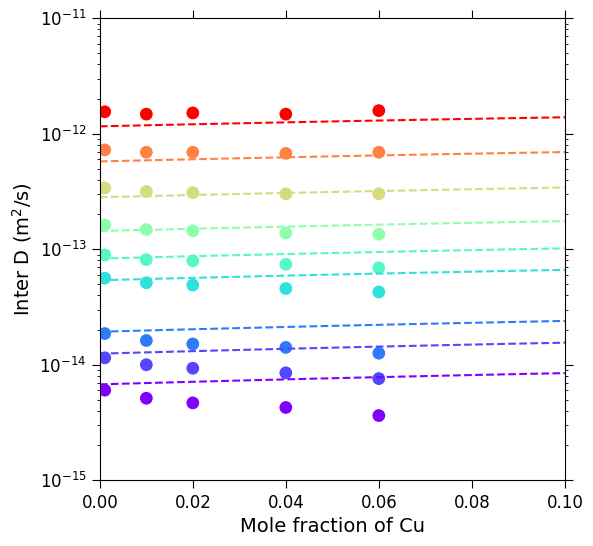

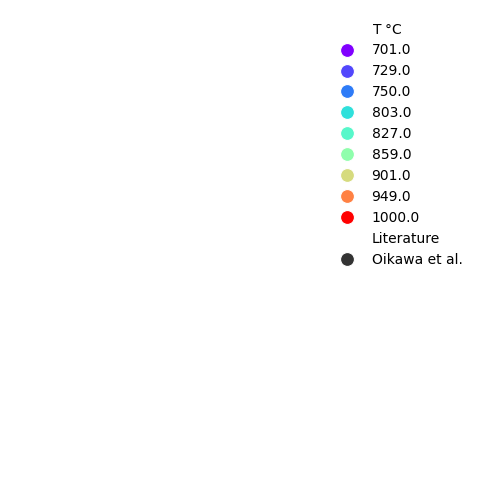

In [22]:
fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
fig_legend, ax_legend = plt.subplots(figsize=(6,6))
conditions_plot(diffusion_data, grid_data, literature_list, x_type, ax, ax_legend, diffusion_type="DC",
                element="", x_axis_element="B", palette="rainbow")
ax.set_xlim(0, 0.1)

In [23]:
# fig.savefig("plot_Oikawa et al.png", dpi=400)

In [24]:
comps = diffusion_data.data.comp_A_mf.unique()
temps = np.arange(diffusion_data.data.temp_celsius.min(), diffusion_data.data.temp_celsius.max() + 20, 20)
grid_data = comp_temp_dataframe(comps, temps)
grid_data["TF"] = thermodynamic_factor_user_defined(elements, phase, diffusion_data.thermodynamic_interaction_parameters, grid_data["comp_B_mf"], grid_data["temp_kelvin"])
# grid_data["TF"] = thermodynamic_factor_calphad_engine(grid_data, diffusion_data.elements, "TCAL7")
end_dc = end_member_diffusion_coefs(diffusion_data.elements, end_member_file, grid_data["temp_kelvin"])
all_dc = binary_diffusion_coefs(optimizer.optimized_results["optimized_params"], grid_data["comp_A_mf"],                                                    grid_data["temp_kelvin"], grid_data["TF"], end_dc)

grid_data = pd.concat([grid_data, pd.DataFrame(all_dc)], axis=1)

In [25]:
grid_data

,comp_A_mf,comp_B_mf,temp_celsius,temp_kelvin,TF,DTA,DTB,DIA,DIB,DC
0,0.991647,0.008353,653.0,926.0,1.0,1.625060e-15,2.229266e-15,1.625060e-15,2.229266e-15,2.224219e-15
1,0.974463,0.025537,653.0,926.0,1.0,1.769785e-15,2.340937e-15,1.769785e-15,2.340937e-15,2.326351e-15
2,0.966348,0.033652,653.0,926.0,1.0,1.840293e-15,2.392675e-15,1.840293e-15,2.392675e-15,2.374087e-15
3,0.974702,0.025298,653.0,926.0,1.0,1.767732e-15,2.339404e-15,1.767732e-15,2.339404e-15,2.324942e-15
4,0.955609,0.044391,653.0,926.0,1.0,1.935616e-15,2.459951e-15,1.935616e-15,2.459951e-15,2.436675e-15
...,...,...,...,...,...,...,...,...,...,...
337,0.998939,0.001061,1013.0,1286.0,1.0,9.367937e-13,1.376694e-12,9.367937e-13,1.376694e-12,1.376227e-12
338,0.990000,0.010000,1013.0,1286.0,1.0,9.715245e-13,1.406187e-12,9.715245e-13,1.406187e-12,1.401840e-12
339,0.980000,0.020000,1013.0,1286.0,1.0,1.011084e-12,1.438761e-12,1.011084e-12,1.438761e-12,1.430207e-12
340,0.960000,0.040000,1013.0,1286.0,1.0,1.092291e-12,1.502326e-12,1.092291e-12,1.502326e-12,1.485925e-12


In [26]:
literature_list = diffusion_data.data["Literature"].unique()[4:5]
x_type = "temperature"
literature_list

array(['Oikawa et al.'], dtype=object)

(8.0, 12.0)

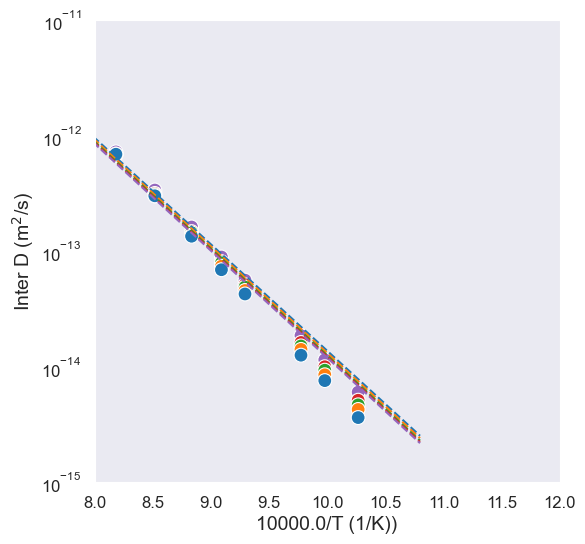

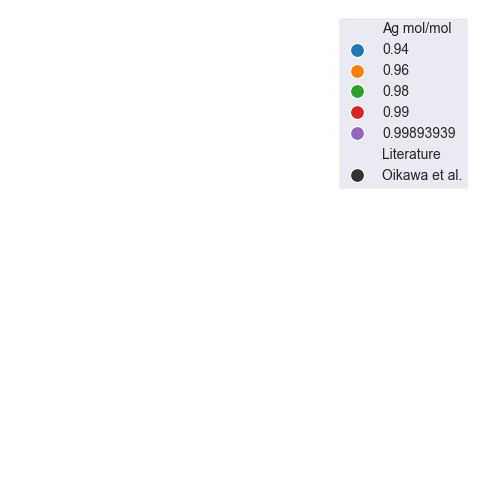

In [27]:

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
fig_legend, ax_legend = plt.subplots(figsize=(6,6))
conditions_plot(diffusion_data, grid_data, literature_list, x_type, ax, ax_legend, diffusion_type="DC",
                element="", x_axis_element="B", palette="tab10")
ax.set_xlim(8, 12)

In [28]:
# data_file = "C:/Users/ustcw/Desktop/Research/Binary_assessment/FCC_ub_params.xlsx"
# save_file = "all_end_members_database.json"
# end_member_database_from_excel_to_json(data_file, save_file)




In [29]:
diffusion_data.data.iloc[0]["A_mp"]

99.164678